# Next published article will get popular or not?

## Problem Statement:
Mashable is a global, multi – platform media and entertainment company. Powered by its own proprietary technology, Mashable is the go-to source for tech, digital culture and entertainment content for its dedicated and influential audience around the globe. Just like any other media company its success depends on the popularity of articles. And one of the key metrics to measure popularity is number of shares done on the article.
Over the period of few years, Mashable has collected data on around 40, 000 articles. The goal is to do analysis and modelling to predict the number of shares of an article given the input parameters.

## Fields in the dataset :
- Attribute Information:
     - Number of Attributes: 61 including target column -- shares

## Objective:
- 1.To analyse different factors which are affecting the count of users for article sharing.
- 2.To consider all the important factors and come out with best features, which are related most with the users of article sharing.
- 3.Predicting the popularity of news can be formulated in many ways
- 4.Regression Formulation: Given the features of an article, predict the “number of shares” that the article will get once it is published.
- 5.Classification Formulation: Given the features of an article, predict whether the article will be popular or not.

## Critical Thinking Approach:
- Online platforms like Medium, Buzzfeed and Mashable etc. publish hundreds of articles every day. These articles belong to certain categories like entertainment, technology, sports etc. and are posted on different days of the week. This project aims to predict the popularity of an online news article before it is published. Such a tool will help publishers and editors in maximizing the popularity of their articles and sell advertisement. 
- As the Article popularity plays a very important role in functioning of an online company as well as E-business models. Here are a few ways in which we may increase the popularity of article.
- Some of them are:

1. Search Engine Optimization (SEO)

2. Pay Per Click (PPC) Advertisement

3. Social Media

4. In-Person Networking

5. Blogging

6. Referrals

7. Moreover, we can also break up Long Posts by Using the Page-Link Tag.Also by insert relevant and related links in the right places.Then one other option is by interlinking the various internal articles.

8. Also by including more graphics, animated images and relevant video contents can help increasing the popularity of article.

## Hypothesis:
- Various hypothesis were taken into consideration while analysing each of the data features.
- we may hypothesize that people do not like to read longer news articles and hence would not share longer articles. 
- we may hypothesize that it is not necessary that more the number of articles published, more will be the shares and hence would not rely on the quantity only.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Dataset and getting basic info :

### Dataset Info:
- The dataset has 59 attributes (as numerical values) and first 2 columns are metadata describing different aspects of each article, from a total of 39,644 articles.

In [67]:
data=pd.read_csv("OnlineNewsPopularity.csv")

In [3]:
data.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [87]:
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [5]:
data.shape

(39644, 61)

In [6]:
data.size

2418284

In [7]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [89]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null int64
n_tokens_title                   39644 non-null int64
n_tokens_content                 39644 non-null int64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null int64
num_self_hrefs                   39644 non-null int64
num_imgs                         39644 non-null int64
num_videos                       39644 non-null int64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null int64
data_channel_is_lifestyle        39644 non-null int64
data_channel_is_entertainment    39644 non-null int64
data_channel_is_bus              39644 non-null int64
data_channel_is_so

In [79]:
# calculating number of each shares

shares_c = data.shares.value_counts()
shares_c.reset_index()

,index,shares
0,1100,2308
1,1200,2018
2,1300,1740
3,1400,1592
4,1500,1323
5,1000,1177
6,1600,1137
7,1700,1013
8,1800,889
9,1900,810


# Checking and dropping null values

In [9]:
data.isnull().sum()

url                              0
timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_s

## No null values found, so we will remove only URL and time delta columns as they are metdata :

In [10]:
data_drop=data.drop(columns=['url','timedelta'])

In [11]:
data_drop.shape

(39644, 59)

In [12]:
data_drop.size

2338996

In [13]:
print(data_drop.columns)

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

## Identifying Outliers using IQR method

##### Outliers identification have multiple methods like Z-score,Modified Z-score,IQR,Box-plot,here we will use IQR and box plot to identify outliers and then treat accordingly

In [14]:
# By using IQR method :

# Getting outliers count for every column:

def outliercount(m):
    for i in m.columns:
        print(i)
        q3=m[i].quantile(0.75)
        q1=m[i].quantile(0.25)
        iqr=q3-q1
        ub=q3+(1.5*iqr)
        lb=q1-(1.5*iqr)
        c=len(m[m[i]>ub]) #inner argument will return boolean values
        d=len(m[m[i]<lb]) #inner argument will return boolean values
        res=c+d
        print(res)
outliercount(data_drop)

n_tokens_title
156
n_tokens_content
1933
n_unique_tokens
1604
n_non_stop_words
2328
n_non_stop_unique_tokens
1733
num_hrefs
2169
num_self_hrefs
2090
num_imgs
7703
num_videos
2946
average_token_length
1681
num_keywords
51
data_channel_is_lifestyle
2099
data_channel_is_entertainment
7057
data_channel_is_bus
6258
data_channel_is_socmed
2323
data_channel_is_tech
7346
data_channel_is_world
8427
kw_min_min
4677
kw_max_min
3661
kw_avg_min
2081
kw_min_max
5063
kw_max_max
9440
kw_avg_max
960
kw_min_avg
0
kw_max_avg
2391
kw_avg_avg
1629
self_reference_min_shares
4976
self_reference_max_shares
4183
self_reference_avg_sharess
4209
weekday_is_monday
6661
weekday_is_tuesday
7390
weekday_is_wednesday
7435
weekday_is_thursday
7267
weekday_is_friday
5701
weekday_is_saturday
2453
weekday_is_sunday
2737
is_weekend
5190
LDA_00
5282
LDA_01
5834
LDA_02
3541
LDA_03
1075
LDA_04
0
global_subjectivity
1912
global_sentiment_polarity
825
global_rate_positive_words
497
global_rate_negative_words
1324
rate_positive

In [91]:
# Getting outliers count for shares(target) column:

Q1 = data_drop['shares'].quantile(0.25)
Q3 = data_drop['shares'].quantile(0.75) 
iqr = Q3 - Q1
print('iqr is:',iqr)

UB = Q3 + 1.5 * iqr
LB = Q1 - 1.5 * iqr
print('Upper bound is:',UB)
print('Lower bound is:',LB)

print('total outliers :',len(data_drop[data_drop['shares']>UB]))
print('total outliers :',len(data_drop[data_drop['shares']<LB]))

iqr is: 1854.0
Upper bound is: 5581.0
Lower bound is: -1835.0
total outliers : 4541
total outliers : 0


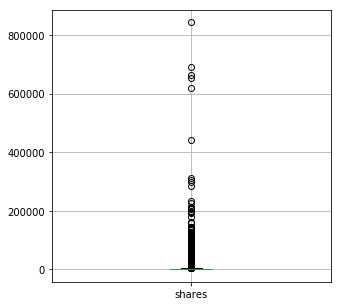

In [15]:
shares1=data_drop[['shares']]
shares1
shares1.boxplot(figsize=(5,5))
plt.show()

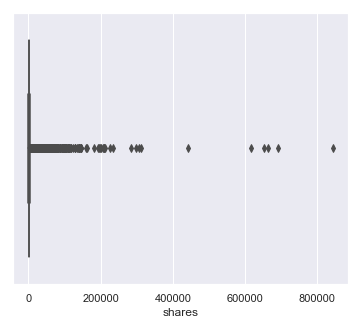

In [85]:
# Alternatively :
#box plot of shares:

sns.set(rc={'figure.figsize':(6,5)})
sns.boxplot(data_drop['shares'])
plt.show()

In [92]:
df_1 = data_drop[data_drop['shares']< UB]
print(len(df_1))

35103


#### - So here we are losing so much data so don't need to drop outliers.

## Skewness Check

In [78]:
print(len(data_drop['shares']))
print(data_drop['shares'].skew())

39644
33.96388487571415


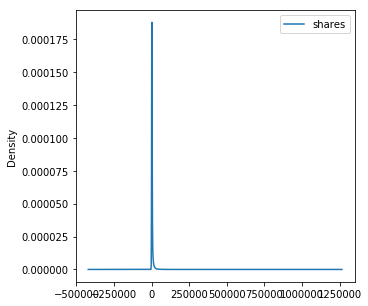

In [16]:
shares1.plot.density(figsize=(5,5))
plt.show()

# Univariate Analysis

### Maximum number of shares of an article was 843300 and Minimum was 1

In [17]:
# Highest-maximum shares
data_drop['shares'].max()

843300

In [18]:
# Minimum-Least shares
data_drop['shares'].min()

1

In [19]:
# we got the the data related with maximum shares
data_drop[data_drop.shares==data_drop['shares'].max()]

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
9365,12,688,0.500734,1.0,0.643357,28,3,15,1,4.893895,...,0.05,1.0,-0.217593,-0.4,-0.05,0.1,-0.3,0.4,0.3,843300


In [20]:
## we got the the data related with minimum shares
data_drop[data_drop.shares==data_drop['shares'].min()]

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
17266,11,944,0.52164,1.0,0.66723,28,4,0,23,4.648305,...,0.05,1.0,-0.299306,-0.6,-0.125,0.0,0.0,0.5,0.0,1


In [21]:
data_drop[['n_tokens_content','shares']]

,n_tokens_content,shares
0,219,593
1,255,711
2,211,1500
3,531,1200
4,1072,505
5,370,855
6,960,556
7,989,891
8,97,3600
9,231,710


### Article with maximum share was published on Wednesday, having 15 images,only 1 video

In [22]:
data_drop[['n_tokens_title','n_tokens_content','num_hrefs',
          'num_self_hrefs','num_imgs','num_videos','num_keywords','shares']][data_drop.shares==data_drop['shares'].max()]

,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,shares
9365,12,688,28,3,15,1,6,843300


In [23]:
data_drop[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday',
          'weekday_is_thursday','weekday_is_friday','is_weekend','shares']][data_drop.shares==data_drop['shares'].max()]

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,shares
9365,0,0,1,0,0,0,843300


In [24]:
data[['url','shares']][data.shares==data['shares'].max()]

,url,shares
9365,http://mashable.com/2013/07/03/low-cost-iphone/,843300


In [25]:
print("skewness of the column shares is:",data_drop['shares'].skew())

skewness of the column shares is: 33.96388487571415


In [26]:
data_log=np.log(data_drop['shares'])
data_log=pd.DataFrame(data_log)
print("reduced skewness of the column shares is now: ",(data_log['shares']).skew())

reduced skewness of the column shares is now:  1.017799445530757


In [27]:
data_power=np.power(data_drop['shares'],-0.1)
data_power=pd.DataFrame(data_power)
print("reduced skewness of the column shares is now: ",(data_power['shares']).skew())

reduced skewness of the column shares is now:  -0.5162614191097472


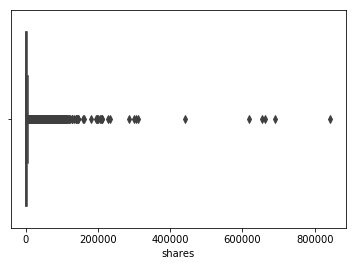

In [28]:
#box plot of shares before treatment
sns.boxplot(data_drop['shares'])
plt.show()

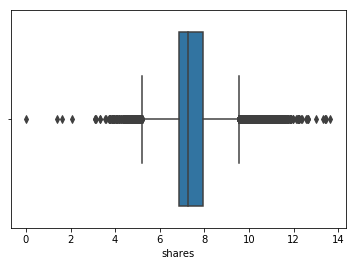

In [29]:
#Box plot of data_log
sns.boxplot(data_log['shares'])
plt.show()

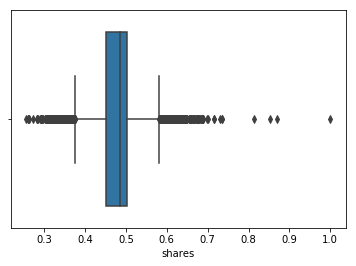

In [30]:
#box plot of data_power
sns.boxplot(data_power['shares'])
plt.show()

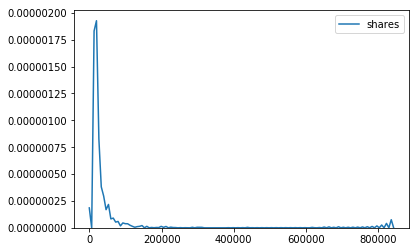

In [31]:
sns.kdeplot(data_drop['shares'])
plt.show()

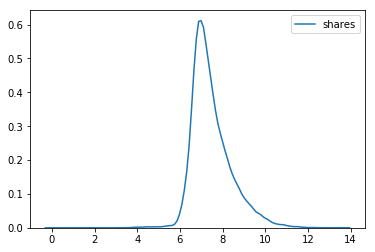

In [32]:
sns.kdeplot(data_log['shares'])

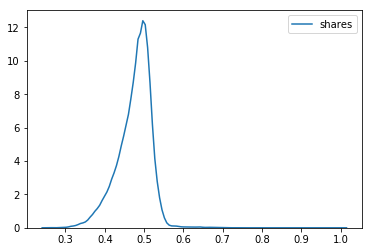

In [33]:
sns.kdeplot(data_power['shares'])

## The highest number of articles published by mashable falls into 'World' data channel category 

In [34]:
#Total category of articles published by Mashable
channels=data[['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed'
                           ,'data_channel_is_tech','data_channel_is_world',]].astype(int)
def count_plot2(x):
    for i in x.columns:
        print(i)
        b1=len(x[x[i]==1])
        print(b1)
        print()
count_plot2(channels)

data_channel_is_lifestyle
2099

data_channel_is_entertainment
7057

data_channel_is_bus
6258

data_channel_is_socmed
2323

data_channel_is_tech
7346

data_channel_is_world
8427



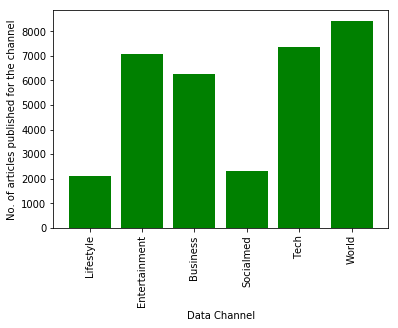

In [35]:
data14= [2099,7057,6258,2323,7346,8427]
data15=['Lifestyle', 'Entertainment','Business','Socialmed','Tech','World']
plt.bar(data15,data14,color='green')
plt.xlabel('Data Channel')
plt.ylabel('No. of articles published for the channel')
plt.xticks(rotation=90)
plt.show()

## We can say that:
- i) Not enough data was collected for the weekends or
- ii) Mashable tends to publish fewer articles during the weekends than it does during the weekdays.

In [36]:
Days=data_drop[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday',
               'weekday_is_friday','weekday_is_saturday','weekday_is_sunday']].astype(int)
def count_plot3(d):
    for i in d.columns:
        print(i)
        b2=len(d[d[i]==1])
        print(b2)
        print()
count_plot3(Days)

weekday_is_monday
6661

weekday_is_tuesday
7390

weekday_is_wednesday
7435

weekday_is_thursday
7267

weekday_is_friday
5701

weekday_is_saturday
2453

weekday_is_sunday
2737



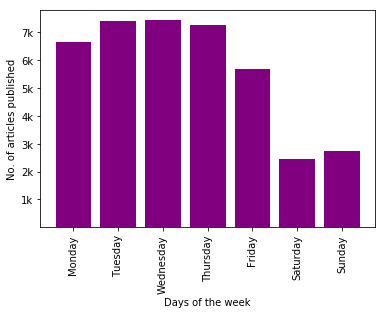

In [37]:
data16= [6661,7390,7435,7267,5701,2453,2737]
data17=['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.bar(data17,data16,color='purple')
plt.xlabel('Days of the week')
plt.yticks([1000,2000,3000,4000,5000,6000,7000],['1k','2k','3k','4k','5k','6k','7k'])
plt.ylabel('No. of articles published')
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis

### Checking correlation:

In [38]:
data_drop.corr()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
n_tokens_title,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,-0.071403,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,0.167789,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,0.026407,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,0.031554,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,0.034185,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,0.222588,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,0.126879,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,0.033924,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,-0.002940,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936
average_token_length,-0.071403,0.167789,0.026407,0.031554,0.034185,0.222588,0.126879,0.033924,-0.002940,1.000000,...,0.222207,0.471383,-0.324529,-0.278784,-0.194660,-0.040406,-0.016718,0.026586,-0.036953,-0.022007


## So we will select necessary columns and then again perform correlation,dropping columns of sentiment analysis

In [61]:
new_data=data_drop[['n_tokens_title','n_tokens_content','n_unique_tokens','n_non_stop_unique_tokens',
                   'num_hrefs','num_self_hrefs','num_imgs','num_videos','average_token_length',
                   'num_keywords','self_reference_min_shares','self_reference_max_shares',
                   'self_reference_avg_sharess','shares']]

In [71]:
new_data2=data_drop[['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed',
                     'data_channel_is_tech','data_channel_is_world','weekday_is_monday',
                     'weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday',
                     'weekday_is_friday','weekday_is_saturday','weekday_is_sunday','shares']]

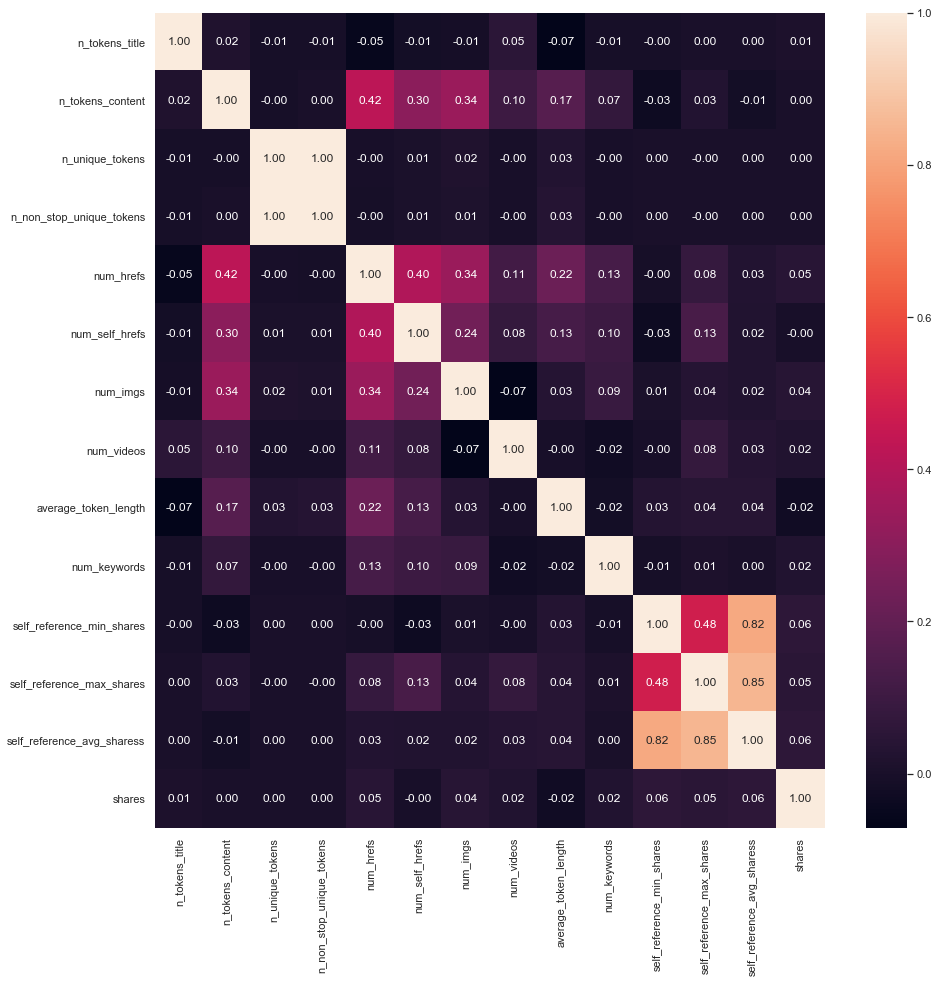

In [64]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(new_data.corr(),annot=True,fmt='.2f')
plt.show()

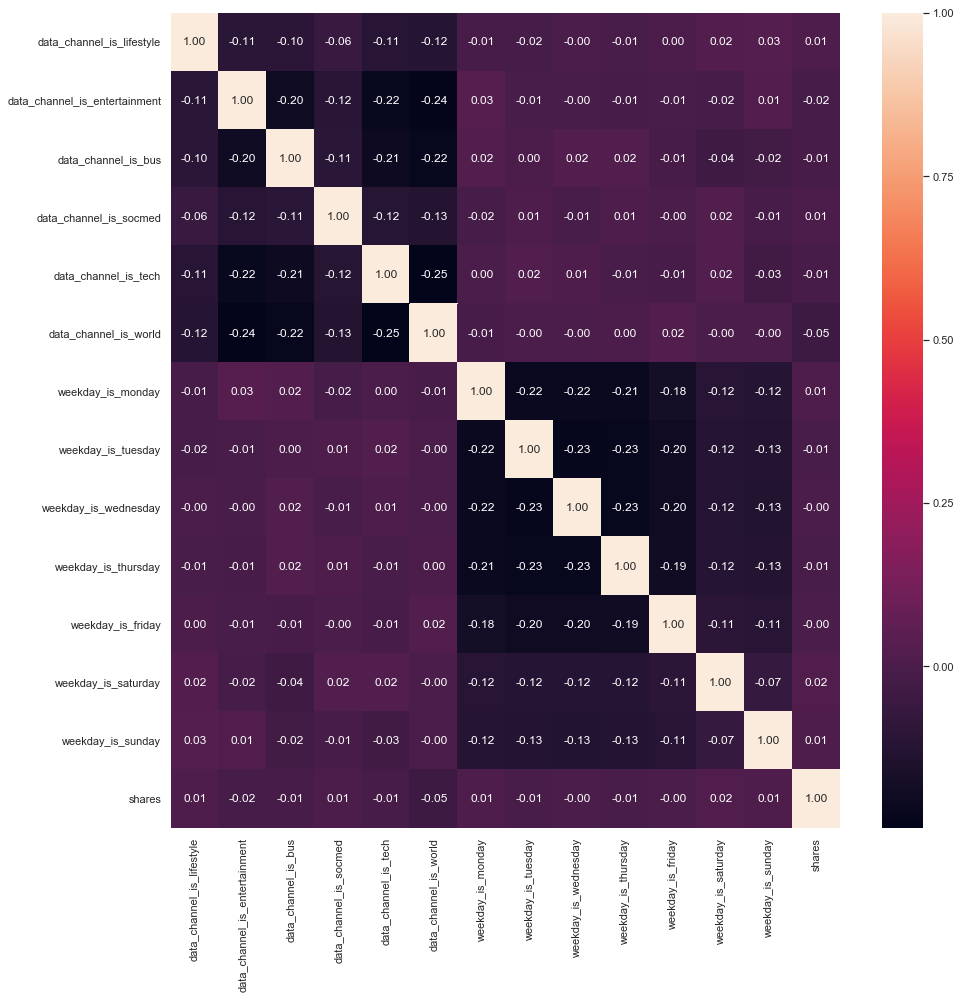

In [73]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(new_data2.corr(),annot=True,fmt='.2f')
plt.show()

In [65]:
new_data.corr()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,shares
n_tokens_title,1.000000,0.018160,-0.005318,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,-0.071403,-0.006077,-0.004563,0.000128,0.000661,0.008783
n_tokens_content,0.018160,1.000000,-0.004737,0.000373,0.423065,0.304682,0.342600,0.103699,0.167789,0.072845,-0.030686,0.025657,-0.013809,0.002459
n_unique_tokens,-0.005318,-0.004737,1.000000,0.999852,-0.004352,0.006620,0.018802,-0.000597,0.026407,-0.003679,0.001036,-0.000222,0.001992,0.000806
n_non_stop_unique_tokens,-0.005420,0.000373,0.999852,1.000000,-0.004983,0.007584,0.014230,-0.000963,0.034185,-0.004440,0.000989,-0.000077,0.002009,0.000114
num_hrefs,-0.053496,0.423065,-0.004352,-0.004983,1.000000,0.396452,0.342633,0.114518,0.222588,0.125890,-0.004804,0.080394,0.025239,0.045404
num_self_hrefs,-0.014856,0.304682,0.006620,0.007584,0.396452,1.000000,0.238586,0.077458,0.126879,0.099578,-0.031229,0.130187,0.022157,-0.001900
num_imgs,-0.008858,0.342600,0.018802,0.014230,0.342633,0.238586,1.000000,-0.067336,0.033924,0.088432,0.007142,0.035067,0.020898,0.039388
num_videos,0.051460,0.103699,-0.000597,-0.000963,0.114518,0.077458,-0.067336,1.000000,-0.002940,-0.022257,-0.003075,0.078296,0.034494,0.023936
average_token_length,-0.071403,0.167789,0.026407,0.034185,0.222588,0.126879,0.033924,-0.002940,1.000000,-0.016814,0.031721,0.038471,0.040468,-0.022007
num_keywords,-0.006077,0.072845,-0.003679,-0.004440,0.125890,0.099578,0.088432,-0.022257,-0.016814,1.000000,-0.005290,0.010474,0.003139,0.021818


In [66]:
new_data.corr(method='spearman')

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,shares
n_tokens_title,1.000000,0.010237,-0.033676,-0.027679,-0.061430,0.023706,-0.012670,0.116492,-0.091726,-0.011685,0.002111,0.019062,0.011000,-0.040278
n_tokens_content,0.010237,1.000000,-0.720436,-0.537009,0.506176,0.209619,0.391022,-0.037341,0.063299,0.079134,-0.065250,0.094192,0.040962,0.009675
n_unique_tokens,-0.033676,-0.720436,1.000000,0.881304,-0.252406,-0.055616,-0.368719,0.056877,0.152023,-0.095009,0.162454,0.044404,0.086910,-0.044840
n_non_stop_unique_tokens,-0.027679,-0.537009,0.881304,1.000000,-0.308175,-0.088480,-0.444864,0.046188,0.033453,-0.103169,0.094532,-0.013588,0.022124,-0.070707
num_hrefs,-0.061430,0.506176,-0.252406,-0.308175,1.000000,0.354413,0.349176,-0.032617,0.273915,0.174316,0.018766,0.208300,0.156447,0.090015
num_self_hrefs,0.023706,0.209619,-0.055616,-0.088480,0.354413,1.000000,0.205893,0.073910,0.003120,0.082701,0.197719,0.542332,0.438110,0.037503
num_imgs,-0.012670,0.391022,-0.368719,-0.444864,0.349176,0.205893,1.000000,-0.168468,0.091764,0.084955,0.115765,0.210168,0.185439,0.083114
num_videos,0.116492,-0.037341,0.056877,0.046188,-0.032617,0.073910,-0.168468,1.000000,-0.141782,0.017734,0.048864,0.107083,0.096953,0.048511
average_token_length,-0.091726,0.063299,0.152023,0.033453,0.273915,0.003120,0.091764,-0.141782,1.000000,0.017071,0.005209,-0.003161,-0.004428,-0.057335
num_keywords,-0.011685,0.079134,-0.095009,-0.103169,0.174316,0.082701,0.084955,0.017734,0.017071,1.000000,0.009731,0.029692,0.027840,0.071253


In [74]:
new_data2.corr()

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,shares
data_channel_is_lifestyle,1.000000,-0.110032,-0.102368,-0.058990,-0.112763,-0.122849,-0.009242,-0.016566,-0.001632,-0.007791,0.001012,0.024370,0.028920,0.005831
data_channel_is_entertainment,-0.110032,1.000000,-0.201476,-0.116101,-0.221935,-0.241785,0.030385,-0.005163,-0.004814,-0.010668,-0.008049,-0.015507,0.012690,-0.017006
data_channel_is_bus,-0.102368,-0.201476,1.000000,-0.108015,-0.206478,-0.224945,0.018787,0.002745,0.017254,0.015533,-0.013393,-0.041412,-0.024300,-0.012376
data_channel_is_socmed,-0.058990,-0.116101,-0.108015,1.000000,-0.118983,-0.129625,-0.015314,0.006887,-0.005411,0.010320,-0.000630,0.016165,-0.009904,0.005021
data_channel_is_tech,-0.112763,-0.221935,-0.206478,-0.118983,1.000000,-0.247787,0.000125,0.017444,0.006536,-0.006136,-0.012468,0.018987,-0.028467,-0.013253
data_channel_is_world,-0.122849,-0.241785,-0.224945,-0.129625,-0.247787,1.000000,-0.009879,-0.003937,-0.002438,0.003868,0.016368,-0.000621,-0.003598,-0.049497
weekday_is_monday,-0.009242,0.030385,0.018787,-0.015314,0.000125,-0.009879,1.000000,-0.215107,-0.215912,-0.212904,-0.184173,-0.115413,-0.122379,0.009726
weekday_is_tuesday,-0.016566,-0.005163,0.002745,0.006887,0.017444,-0.003937,-0.215107,1.000000,-0.229976,-0.226772,-0.196169,-0.122931,-0.130351,-0.007941
weekday_is_wednesday,-0.001632,-0.004814,0.017254,-0.005411,0.006536,-0.002438,-0.215912,-0.229976,1.000000,-0.227620,-0.196903,-0.123390,-0.130838,-0.003801
weekday_is_thursday,-0.007791,-0.010668,0.015533,0.010320,-0.006136,0.003868,-0.212904,-0.226772,-0.227620,1.000000,-0.194160,-0.121672,-0.129016,-0.008833


In [76]:
new_data2.corr(method='spearman')

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,shares
data_channel_is_lifestyle,1.000000,-0.110032,-0.102368,-0.058990,-0.112763,-0.122849,-0.009242,-0.016566,-0.001632,-0.007791,0.001012,0.024370,0.028920,0.042547
data_channel_is_entertainment,-0.110032,1.000000,-0.201476,-0.116101,-0.221935,-0.241785,0.030385,-0.005163,-0.004814,-0.010668,-0.008049,-0.015507,0.012690,-0.114691
data_channel_is_bus,-0.102368,-0.201476,1.000000,-0.108015,-0.206478,-0.224945,0.018787,0.002745,0.017254,0.015533,-0.013393,-0.041412,-0.024300,-0.018311
data_channel_is_socmed,-0.058990,-0.116101,-0.108015,1.000000,-0.118983,-0.129625,-0.015314,0.006887,-0.005411,0.010320,-0.000630,0.016165,-0.009904,0.113572
data_channel_is_tech,-0.112763,-0.221935,-0.206478,-0.118983,1.000000,-0.247787,0.000125,0.017444,0.006536,-0.006136,-0.012468,0.018987,-0.028467,0.094519
data_channel_is_world,-0.122849,-0.241785,-0.224945,-0.129625,-0.247787,1.000000,-0.009879,-0.003937,-0.002438,0.003868,0.016368,-0.000621,-0.003598,-0.168441
weekday_is_monday,-0.009242,0.030385,0.018787,-0.015314,0.000125,-0.009879,1.000000,-0.215107,-0.215912,-0.212904,-0.184173,-0.115413,-0.122379,-0.019638
weekday_is_tuesday,-0.016566,-0.005163,0.002745,0.006887,0.017444,-0.003937,-0.215107,1.000000,-0.229976,-0.226772,-0.196169,-0.122931,-0.130351,-0.041051
weekday_is_wednesday,-0.001632,-0.004814,0.017254,-0.005411,0.006536,-0.002438,-0.215912,-0.229976,1.000000,-0.227620,-0.196903,-0.123390,-0.130838,-0.048131
weekday_is_thursday,-0.007791,-0.010668,0.015533,0.010320,-0.006136,0.003868,-0.212904,-0.226772,-0.227620,1.000000,-0.194160,-0.121672,-0.129016,-0.033897


## We can say that articles with long content are less shared (popular)
- we may hypothesize that people do not like to read longer news articles and hence would not share longer articles. 
- The following graph supports our hypothesis and indicates a negative correlation between the number of words in the content and the number of shares:

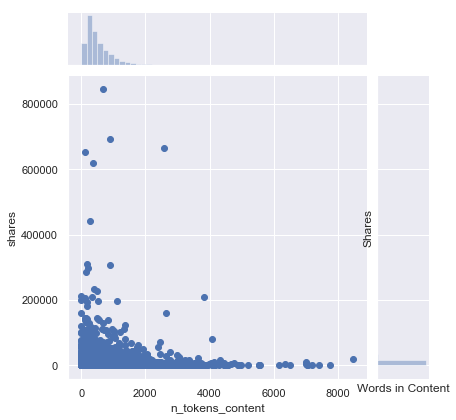

In [60]:
sns.jointplot(x=data_drop['n_tokens_content'],y=data_drop['shares'])
plt.xlabel("Words in Content")
plt.ylabel("Shares")
plt.show()

#### - Scatter Plot: Number of words in the content of the article vs number of shares

## We can say the lifestyle category have lowest no. of articles published, still got the overall highest shares
- we may hypothesize that it is not necessary that more the number of articles published, more will be the shares and hence would not rely on the quantity only. 
- so by hypothesis, There is no relation between the number of articles published with the number of shares
- The following graph supports our hypothesis and indicates that even though the categories with lesser number of publish get more shares compared to those published more

In [68]:
channels13=data[['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','shares']]

In [46]:
lifestyle1=channels13[channels13['data_channel_is_lifestyle']==1][channels13.shares==channels13['shares']].mean()
entertainment1=channels13[channels13['data_channel_is_entertainment']==1][channels13.shares==channels13['shares']].mean()
business1=channels13[channels13['data_channel_is_bus']==1][channels13.shares==channels13['shares']].mean()
tech1=channels13[channels13['data_channel_is_tech']==1][channels13.shares==channels13['shares']].mean()
world1=channels13[channels13['data_channel_is_world']==1][channels13.shares==channels13['shares']].mean()
socmed1=channels13[channels13['data_channel_is_socmed']==1][channels13.shares==channels13['shares']].mean()
#print(lifestyle1,'\n')
#print(entertainment1,'\n')
#print(business1,'\n')
#print(tech1,'\n')
#print(world1,'\n')
#print(socmed1)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed

In [47]:
data = [['Lifestyle',2099,3682], ['Entertainment',7057,2970], ['Business',6258,3063],['Socialmed',2323,3629],['Tech',7346,3620],
        ['World',8427,2287]] 
df2 = pd.DataFrame(data, columns = ['Channels','Total articles published','Avg shares']) 
df2

,Channels,Total articles published,Avg shares
0,Lifestyle,2099,3682
1,Entertainment,7057,2970
2,Business,6258,3063
3,Socialmed,2323,3629
4,Tech,7346,3620
5,World,8427,2287


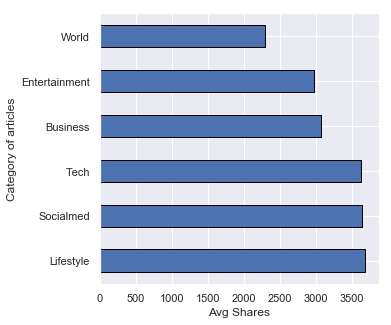

In [99]:
data_14=[3682, 3629, 3620, 3063, 2970, 2287]
#data_14.sort(reverse=True)
data_15=['Lifestyle','Socialmed','Tech','Business','Entertainment','World']
plt.rcParams['figure.figsize']=(5,5)
plt.barh(data_15,data_14,height=0.5,edgecolor='black')
plt.xticks()
plt.xlabel('Avg Shares')
plt.ylabel('Category of articles')
plt.show()

### Inference of insights from the above solution and EDA Strategies.
- This is a classification problem. Some of the features fall into various categories such as quantitative information about the article — such things as number of images, number of videos, etc. — and qualitative information about the article — such as which day it was published and which topic the article falls under.
- Comparing the number of images with the number of shares,it would be wise to include either 0 or 1 image in an article.
- Comparing the number of videos with the number of shares,that articles that have no videos tend to do best
- The weekdays have the highest number of shares when compared to weekends.
- It is not necessary that more the number of articles published will have high chances of getting more shares,so better to invest there where they have more viewers.
### Increase the:
- number of embedded links
- number of images
- number of videos
- amount of subjectivity in title
- amount of subjectivity in content
- number of words which are more popular
- references to older articles which have high popularity
### Decrease the:
- number of longer words in the content
- amount of multi-topic discussion in an article (Articles which talk about multiple topics perform poorly)